In [4]:
import pandas as pd
import scipy.special
import math
from matplotlib.pyplot import plot,scatter
import statistics
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [5]:
years = range(2000, 2021)
leagues = ["nba", "mlb"] # TODO: add other leagues

def get_home_boost(total_pct, home_wins, home_games):
    prob = 0
    for wins in range(math.ceil(home_wins), home_games + 1):
        prob += scipy.special.binom(home_games, wins) * total_pct ** wins * (1-total_pct) ** (home_games - wins)
        
    return math.log(prob)

teamHomeBoosts={}
for league in leagues:
    teamHomeBoosts[league]={}
    for year in years:
        min_team = ""
        min_boost = 0
        
        standings = pd.read_csv("data/" + league + "/" + str(year) + ".csv") 
        for (team, home, road) in zip(standings["Team"], standings["Home"], standings["Road"]):
            [home_wins, home_losses] = [int(games) for games in home.split("-")]
            [road_wins, road_losses] = [int(games) for games in road.split("-")]

            total_wins = home_wins + road_wins
            total_games = total_wins + home_losses + road_losses

            total_pct = total_wins / total_games

            home_games = home_wins + home_losses
            
            boost = get_home_boost(total_pct, home_wins, home_games)
            
            if(team not in teamHomeBoosts[league]):
                teamHomeBoosts[league][team]=[]
            teamHomeBoosts[league][team].append(boost)
            
            if boost < min_boost:
                min_team = team
                min_boost = boost
        print(league, year, min_team, min_boost)     
        
    

nba 2000 Indiana Pacers -5.631077324079996
nba 2001 Denver Nuggets -5.610862267082693
nba 2002 New Jersey Nets -4.228697343452214
nba 2003 Chicago Bulls -8.914917337805443
nba 2004 Dallas Mavericks -7.648357773084604
nba 2005 San Antonio Spurs -6.846028544961502
nba 2006 Orlando Magic -4.676365219094853
nba 2007 Golden State Warriors -5.661837441662076
nba 2008 Utah Jazz -8.016702264422117
nba 2009 Utah Jazz -5.966234135382336
nba 2010 Charlotte Bobcats -5.736040780142513
nba 2011 Washington Wizards -5.555142475073601
nba 2012 Utah Jazz -4.595523957659505
nba 2013 Denver Nuggets -7.929267254368207
nba 2014 Orlando Magic -4.65226216045649
nba 2015 Golden State Warriors -4.345799270948383
nba 2016 San Antonio Spurs -5.9627547043522755
nba 2017 Indiana Pacers -4.7275519246970665
nba 2018 San Antonio Spurs -6.4493585127408375
nba 2019 San Antonio Spurs -4.941070454782477
nba 2020 Philadelphia 76ers -8.91207340615599
mlb 2000 NYM -3.1183210435371995
mlb 2001 FLA -3.29193685603975
mlb 2002 C

In [6]:
other_years = range(2000, 2020)
other_leagues = ["nfl", "nhl"] # TODO: add other leagues

for league in other_leagues:
    teamHomeBoosts[league]={}
    for year in other_years:
        if league == "nhl" and year == 2005:
            continue
        
        min_team = ""
        min_boost = 0
        
        standings = pd.read_csv("data/" + league + "/" + str(year) + ".csv") 
        for (team, games, wins, home_games, home_wins) in zip(standings["Team"], standings["Games"], standings["Wins"], standings["Home Games"], standings["Home Wins"]):
            total_pct = total_wins / total_games
            
            boost = get_home_boost(total_pct, home_wins, home_games)
            
            if(team not in teamHomeBoosts[league]):
                teamHomeBoosts[league][team]=[]
            teamHomeBoosts[league][team].append(boost)
            
            if boost < min_boost:
                min_team = team
                min_boost = boost
        print(league, year, min_team, min_boost)     
        
    

nfl 2000 Minnesota Vikings -6.857530817797155
nfl 2001 Green Bay Packers -6.857530817797155
nfl 2002 Green Bay Packers -9.877955703941518
nfl 2003 Kansas City Chiefs -9.877955703941518
nfl 2004 New England Patriots -9.877955703941518
nfl 2005 Seattle Seahawks -9.877955703941518
nfl 2006 Indianapolis Colts -9.877955703941518
nfl 2007 New England Patriots -9.877955703941518
nfl 2008 Carolina Panthers -9.877955703941518
nfl 2009 Minnesota Vikings -9.877955703941518
nfl 2010 New England Patriots -9.877955703941518
nfl 2011 Green Bay Packers -9.877955703941518
nfl 2012 Seattle Seahawks -9.877955703941518
nfl 2013 New England Patriots -9.877955703941518
nfl 2014 Green Bay Packers -9.877955703941518
nfl 2015 Carolina Panthers -9.877955703941518
nfl 2016 Houston Texans -6.857530817797155
nfl 2017 Philadelphia Eagles -6.857530817797155
nfl 2018 New England Patriots -9.877955703941518
nfl 2019 Green Bay Packers -6.857530817797155
nhl 2000 New Jersey Devils -15.251445696889641
nhl 2001 Colorado A

-3.629395155697537
6
5
Consistent high home boosts: 
[-3.943459424549806, 5.482906443545058] Minnesota Vikings
[-4.212087711854646, 6.109240468141274] Indianapolis Colts
[-4.785610813556119, 4.250779783853469] Baltimore Ravens
[-4.362143455953528, 4.0574173476600865] Pittsburgh Steelers
[-6.285055598057965, 9.375197298281071] New England Patriots
[-4.359237289018542, 10.146992362201468] Seattle Seahawks
[-4.915949030568601, 8.833127325629722] Green Bay Packers
[-3.903510409210428, 7.4688744119006625] Denver Broncos
[-4.576311825940753, 6.788965939669572] Edmonton Oilers
[-7.505800567898623, 7.152683126352298] Philadelphia Flyers
[-4.885725034501183, 10.699525230702413] New York Islanders
[-3.647711127838839, 6.672293967304138] Arizona Coyotes
Consistent low home boosts: 
[-1.7135300943272596, 0.42776039067617716] Seattle SuperSonics
[-1.7779924274765087, 0.6157135441788903] Toronto Raptors
[-1.3869181660869965, 0.5384050674946773] Vancouver Grizzlies
[-1.873143353146407, 0.630892646983

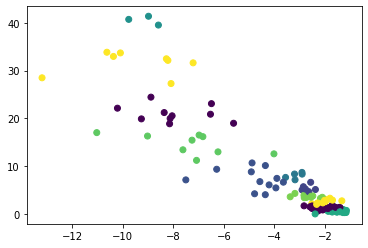

In [7]:
#Are there teams out of all leagues which consistently enjoy a larger home boost?
def computeOptimalClusters(testList):
    xList=[]
    yList=[]
    length=len(tuple(testList))
    list2=[]
    for i in range(1,length+1,1):
        cluster=KMeans(n_clusters=i)
        fit=cluster.fit(testList)
        list2.append([fit.inertia_, i])
    for i in list2:
        xList.append(i[1])
        yList.append(i[0])
    kn = KneeLocator(xList, yList, curve='convex', direction='decreasing')
    print(kn.knee)
    return(kn.knee)

def evaluateConsistency(testList):
    cluster=KMeans(n_clusters=computeOptimalClusters(testList), max_iter=10000, tol=.000000001,algorithm='auto')
    cluster.fit(testList)
    MeasureList=cluster.predict(testList)
    scatter([i[0] for i in testList],[i[1] for i in testList],c=MeasureList)
    minimum=min([index[1] for index in cluster.cluster_centers_])
    minIndex=[i for i in range(0,len(cluster.cluster_centers_)) if cluster.cluster_centers_[i][1]==minimum]
    selectList=[]
    for index,point in zip(MeasureList,testList):
        if(index==minIndex):
            selectList.append(point)
    return selectList

consistencyDict={}
consistencyList=[]
for league in teamHomeBoosts:
    for team in teamHomeBoosts[league]:
        if(len(teamHomeBoosts[league][team])>=2):
            variance=statistics.variance(teamHomeBoosts[league][team])
        
            mean=statistics.mean(teamHomeBoosts[league][team])
            if(mean<=0):
                consistencyDict[team]=[mean,variance]
                consistencyList.append([mean,variance])

meanSet=statistics.mean([item[0] for item in consistencyList])
print(meanSet)
greaterMeanList=[item for item in consistencyList if item[0]<meanSet]
lesserMeanList=[item for item in consistencyList if item[0]>meanSet]
consistentValuesLesser=evaluateConsistency(lesserMeanList)
consistentValuesGreater=evaluateConsistency(greaterMeanList)
print("Consistent high home boosts: ")
for i in consistentValuesGreater:
    print(i,list(consistencyDict.keys())[list(consistencyDict.values()).index(i)])
print("Consistent low home boosts: ")
for i in consistentValuesLesser:
    print(i,list(consistencyDict.keys())[list(consistencyDict.values()).index(i)])






-2.1870050831905194
3
3
Consistent high home boosts: 
[-2.4762455958750644, 1.1404442632558969] Portland Trail Blazers
[-2.215768978810253, 0.9406476993508954] Milwaukee Bucks
[-2.5133270841841795, 1.1961587853000308] Cleveland Cavaliers
[-2.2720564120204325, 0.6586821939454445] Memphis Grizzlies
[-2.390434647143609, 0.03998196474712973] New Orleans/Oklahoma City Hornets
Consistent low home boosts: 
[-1.7135300943272596, 0.42776039067617716] Seattle SuperSonics
[-1.7779924274765087, 0.6157135441788903] Toronto Raptors
[-1.3869181660869965, 0.5384050674946773] Vancouver Grizzlies
[-1.873143353146407, 0.6308926469839363] New Orleans Hornets
[-1.8747733791275751, 0.6165427835431679] Oklahoma City Thunder
[-1.471184180597055, 0.6857593767662269] Brooklyn Nets


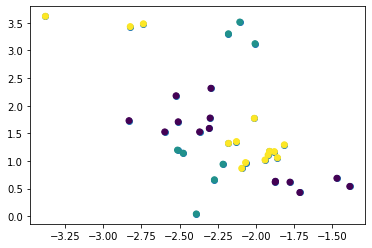

In [8]:
#which teams in the nba enjoy consistent higher and lower home boosts?
consistencyDict={}
consistencyList=[]

for team in teamHomeBoosts["nba"]:
    if(len(teamHomeBoosts["nba"][team])>=2):
        variance=statistics.variance(teamHomeBoosts["nba"][team])
        mean=statistics.mean(teamHomeBoosts["nba"][team])
        if(mean<=0):
            consistencyDict[team]=[mean,variance]
            consistencyList.append([mean,variance])
                                   
                                   
scatter([index[0] for index in consistencyList],[index[1] for index in consistencyList])

meanSet=statistics.mean([item[0] for item in consistencyList])
print(meanSet)
greaterMeanList=[item for item in consistencyList if item[0]<meanSet]
lesserMeanList=[item for item in consistencyList if item[0]>meanSet]
consistentValuesLesser=evaluateConsistency(lesserMeanList)
consistentValuesGreater=evaluateConsistency(greaterMeanList)
print("Consistent high home boosts: ")
for i in consistentValuesGreater:
    print(i,list(consistencyDict.keys())[list(consistencyDict.values()).index(i)])
print("Consistent low home boosts: ")
for i in consistentValuesLesser:
    print(i,list(consistencyDict.keys())[list(consistencyDict.values()).index(i)])


-1.4789554250230337
4
3
Consistent high home boosts: 
[-1.483274213444073, 0.8410130127713387] STL
[-1.538623415769982, 0.7152701624089012] OAK
[-1.5394543492123318, 0.43878716630043657] NYY
[-1.5205431931980988, 0.4323065925258201] TOR
[-1.6664092482411896, 0.8267655562023609] TEX
Consistent low home boosts: 
[-1.2015413262213155, 0.34976649620739236] SEA
[-1.2362857618230148, 0.32077086315661174] CLE
[-1.2147028203290045, 0.32248927416603757] CIN
[-1.233523340641114, 0.3598868718623436] KCR
[-1.167002183434528, 0.3406885197013865] LAA
[-1.2935378250527012, 0.3166009535556119] WSN


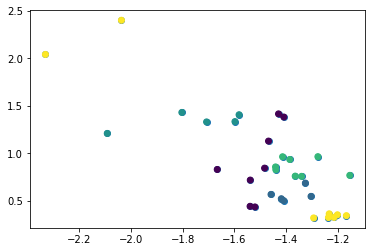

In [9]:
#which teams in the mlb enjoy consistent higher and lower home boosts?
consistencyDict={}
consistencyList=[]

for team in teamHomeBoosts["mlb"]:
    if(len(teamHomeBoosts["mlb"][team])>=2):
        variance=statistics.variance(teamHomeBoosts["mlb"][team])
        mean=statistics.mean(teamHomeBoosts["mlb"][team])
        if(mean<=0):
            consistencyDict[team]=[mean,variance]
            consistencyList.append([mean,variance])
                                   
                                   
scatter([index[0] for index in consistencyList],[index[1] for index in consistencyList])

meanSet=statistics.mean([item[0] for item in consistencyList])
print(meanSet)
greaterMeanList=[item for item in consistencyList if item[0]<meanSet]
lesserMeanList=[item for item in consistencyList if item[0]>meanSet]
consistentValuesLesser=evaluateConsistency(lesserMeanList)
consistentValuesGreater=evaluateConsistency(greaterMeanList)
print("Consistent high home boosts: ")
for i in consistentValuesGreater:
    print(i,list(consistencyDict.keys())[list(consistencyDict.values()).index(i)])
print("Consistent low home boosts: ")
for i in consistentValuesLesser:
    print(i,list(consistencyDict.keys())[list(consistencyDict.values()).index(i)])

-3.0011710348442624
4
3
Consistent high home boosts: 
[-3.943459424549806, 5.482906443545058] Minnesota Vikings
[-4.212087711854646, 6.109240468141274] Indianapolis Colts
[-4.785610813556119, 4.250779783853469] Baltimore Ravens
[-4.362143455953528, 4.0574173476600865] Pittsburgh Steelers
[-3.190817757187607, 4.328670117241199] Philadelphia Eagles
Consistent low home boosts: 
[-1.7124123030795648, 1.9218933682656056] Washington Redskins
[-1.9730950849663047, 2.6756226367196474] Jacksonville Jaguars
[-1.3340508136766407, 2.7759224981844413] Cleveland Browns
[-2.018040838155232, 2.8834334506943677] Tampa Bay Buccaneers
[-1.7037394863716029, 2.9166380722279004] Detroit Lions
[-2.2804850789332605, 2.3140280088387173] New York Jets
[-2.005786441297444, 1.1862558401804035] Buffalo Bills
[-2.0881561040069525, 2.345350844297577] Los Angeles Chargers


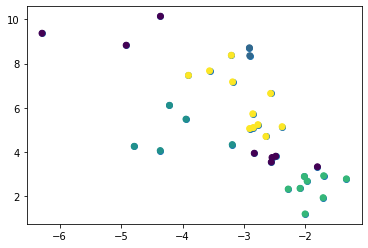

In [10]:
#which teams in the nfl enjoy consistent higher and lower home boosts?
consistencyDict={}
consistencyList=[]

for team in teamHomeBoosts["nfl"]:
    if(len(teamHomeBoosts["nfl"][team])>=2):
        variance=statistics.variance(teamHomeBoosts["nfl"][team])
        mean=statistics.mean(teamHomeBoosts["nfl"][team])
        if(mean<=0):
            consistencyDict[team]=[mean,variance]
            consistencyList.append([mean,variance])
                                   
                                   
scatter([index[0] for index in consistencyList],[index[1] for index in consistencyList])

meanSet=statistics.mean([item[0] for item in consistencyList])
print(meanSet)
greaterMeanList=[item for item in consistencyList if item[0]<meanSet]
lesserMeanList=[item for item in consistencyList if item[0]>meanSet]
consistentValuesLesser=evaluateConsistency(lesserMeanList)
consistentValuesGreater=evaluateConsistency(greaterMeanList)
print("Consistent high home boosts: ")
for i in consistentValuesGreater:
    print(i,list(consistencyDict.keys())[list(consistencyDict.values()).index(i)])
print("Consistent low home boosts: ")
for i in consistentValuesLesser:
    print(i,list(consistencyDict.keys())[list(consistencyDict.values()).index(i)])

-7.935295554585686
4
3
Consistent high home boosts: 
[-9.26404889181831, 19.903860000366137] Dallas Stars
[-9.020923266538354, 16.315564725096905] New Jersey Devils
[-8.361700992039639, 21.224654979709065] Ottawa Senators
[-10.210572334798398, 22.139836413910068] San Jose Sharks
[-8.885730411809647, 24.445368712256332] St. Louis Blues
[-8.048547538910796, 20.54756081484943] Vancouver Canucks
[-8.147973739112746, 18.879567672747346] Colorado Avalanche
[-8.126408720084067, 19.989612971108677] Minnesota Wild
[-11.029065565041295, 17.032721341359398] Anaheim Ducks
Consistent low home boosts: 
[-4.576311825940753, 6.788965939669572] Edmonton Oilers
[-7.505800567898623, 7.152683126352298] Philadelphia Flyers
[-4.885725034501183, 10.699525230702413] New York Islanders
[-3.647711127838839, 6.672293967304138] Arizona Coyotes


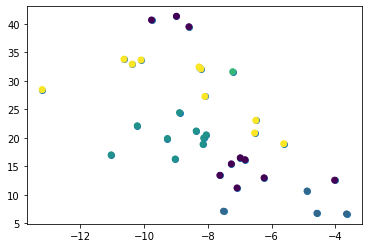

In [11]:
#which teams in the nhl enjoy consistent higher and lower home boosts?
consistencyDict={}
consistencyList=[]

for team in teamHomeBoosts["nhl"]:
    if(len(teamHomeBoosts["nhl"][team])>=2):
        variance=statistics.variance(teamHomeBoosts["nhl"][team])
        mean=statistics.mean(teamHomeBoosts["nhl"][team])
        if(mean<=0):
            consistencyDict[team]=[mean,variance]
            consistencyList.append([mean,variance])
                                   
                                   
scatter([index[0] for index in consistencyList],[index[1] for index in consistencyList])

meanSet=statistics.mean([item[0] for item in consistencyList])
print(meanSet)
greaterMeanList=[item for item in consistencyList if item[0]<meanSet]
lesserMeanList=[item for item in consistencyList if item[0]>meanSet]
consistentValuesLesser=evaluateConsistency(lesserMeanList)
consistentValuesGreater=evaluateConsistency(greaterMeanList)
print("Consistent high home boosts: ")
for i in consistentValuesGreater:
    print(i,list(consistencyDict.keys())[list(consistencyDict.values()).index(i)])
print("Consistent low home boosts: ")
for i in consistentValuesLesser:
    print(i,list(consistencyDict.keys())[list(consistencyDict.values()).index(i)])